# Clustering
You will be asked to implement several functions. Team work is not allowed. 

Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise we will use unsupervised methods for clustering, in this case instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time.

Let's work with 2 popular methods: K-means and Mean-shift.

## Dataset
To get familiar with the adavantages and disanvantages of the methods, we will use 4 different datasets:

1. toy data (2-dimensional blob data that is easy to visualize) for warm up.

2. 2d spiral data

3. country data including some socio-economic and health factors that can jointly determine the overall development of the country. We will use K-means and mean-shift methods on this dataset to make decision to choose the countries that are in the direst need of aid.

4. Iris Dataset - 
A classical plant classification dataset. It contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) and 4 parameters (sepal length, sepal width, petal length, petal width all in cm)

## Objectives
1. Learn to cluster data by kmeans and mean-shift approaches provided by scikit-learn library.
1. Apply previos learned methods to a different dataset
2. Understand how to evaluate them by intuition and metric values
3. implement your own mean shift algorithm

## Contents:
1) scikit-learn K-means (3 points)

    1a) Toy dataset: blobs

    1b) Toy dataset: spirals
    

2) scikit-learn Mean-shift (3 points)

    2a) Toy dataset: blobs

    2b) Toy dataset: spirals

    2c) Spiral Solution
    

3) Country development dataset (3 points)

4) Iris dataset (3 points)

5) Metric based evaluation (3 points)

6) Mean shift implementation (5 points)

## 1) Sklearn K-Means (3 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
%matplotlib inline 

rcParams['figure.figsize'] = 10, 8

### 1a) Toy Dataset: Blobs
- Load toy dataset (blobs).

In [2]:
data_blobs = np.genfromtxt('Datasets/toy_data.csv', delimiter=',')

In [3]:
data_blobs_scaled = StandardScaler().fit_transform(data_blobs)

- Use sklearn kmeans class (with default parameters) to cluster points.

In [4]:
kmeans_clusters = KMeans(random_state=42).fit_predict(data_blobs_scaled)

- Plot clustering results by ```plt.scatter()``` color points according to the cluster it belongs to.

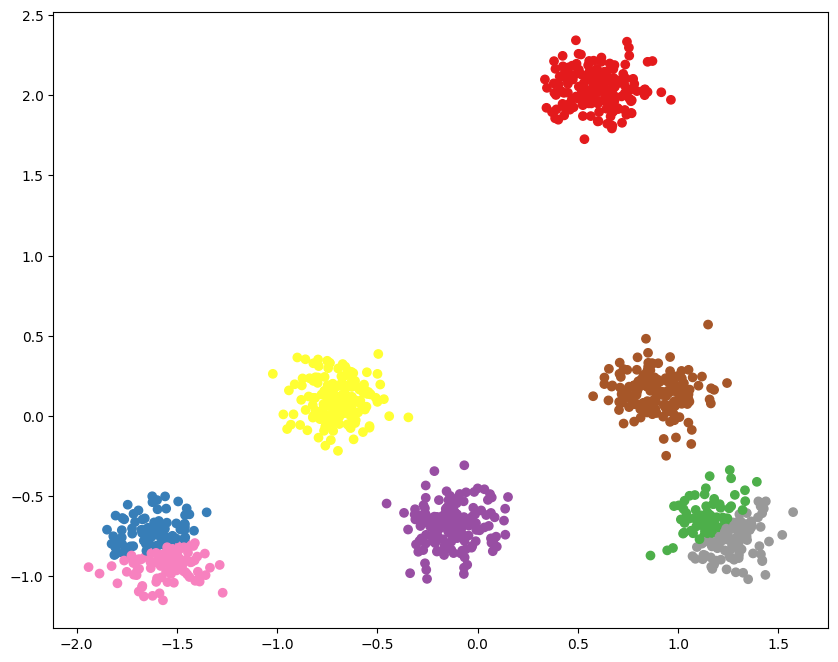

In [5]:
plt.figure()
plt.scatter(x=data_blobs_scaled[:, 0], y=data_blobs_scaled[:,1], c=kmeans_clusters, cmap="Set1")
plt.show()

- Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_custers would you choose?
- Plot your results.

Based on visual inspection, six clusters are identifiable.

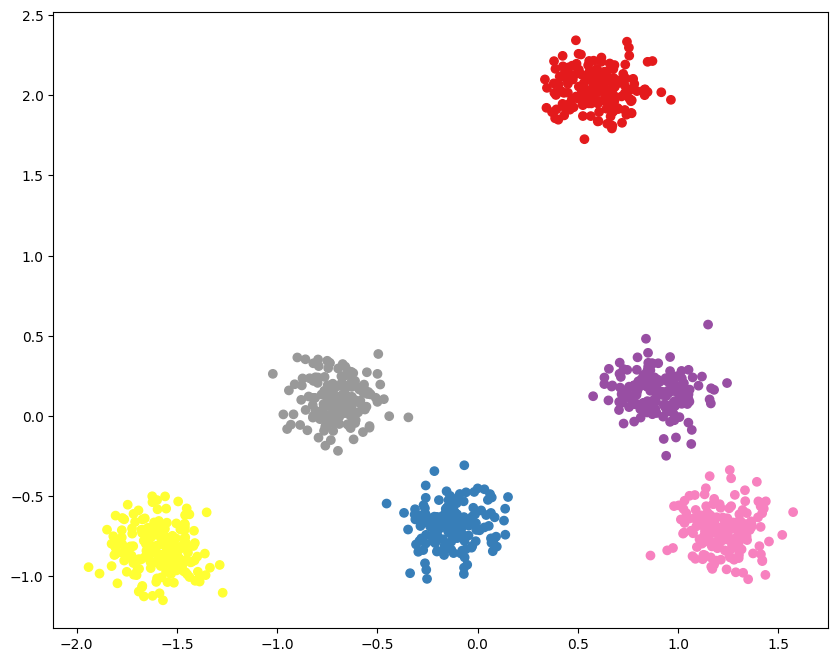

In [6]:
n_clusters = 6
kmeans_clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(data_blobs_scaled)

plt.figure()
plt.scatter(x=data_blobs_scaled[:, 0], y=data_blobs_scaled[:,1], c=kmeans_clusters,cmap="Set1")
plt.show()

### 1b) Spiral Dataset
- Try to use the KMeans to cluster the Spiral dataset.

In [7]:
# load data
spiral = np.load("Datasets/spiral.npz")['x']
print(spiral.shape)

(312, 2)


In [8]:
spiral_scaled = StandardScaler().fit_transform(spiral)

- Use sklearn kmeans to cluster points.
- Plot your results color the points according to the cluster.

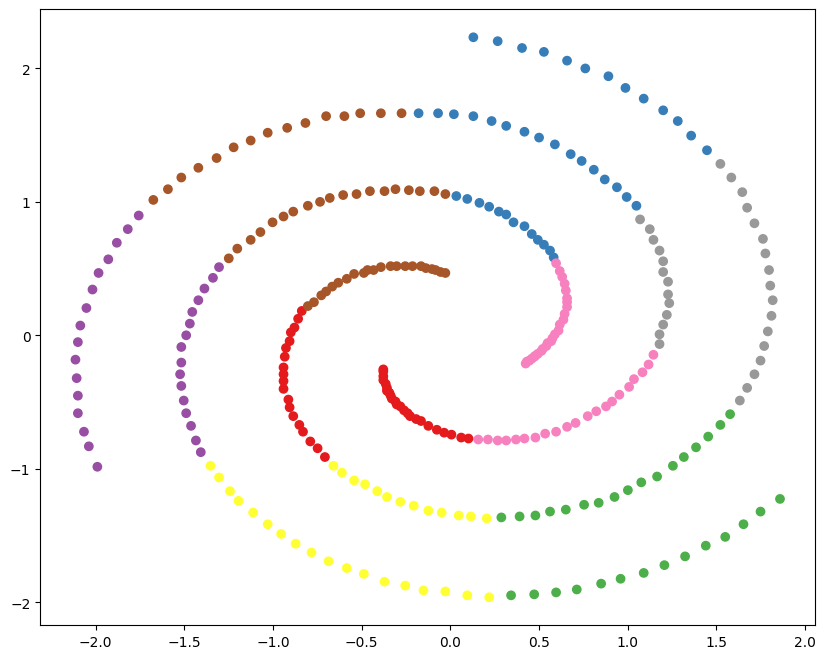

In [9]:
kmeans_clusters = KMeans(random_state=42).fit_predict(spiral_scaled)

plt.figure()
plt.scatter(x=spiral_scaled[:, 0], y=spiral_scaled[:,1], c=kmeans_clusters, cmap="Set1")
plt.show()

### Question
- Does it work? Please explain your answer, which assumptions required for k-means? 
- What limitations do you think K-means would have?
- Can you find a k-means solution for this dataset? Write down your ideas here

KMeans works well for the `blob` example once an appropriate number of clusters has been identified. While the `spiral` data set also has a clear pattern, which can be distinguished by eye, it doesn't work natively with kmeans clustering. This is due to its clusters not having unique cluster centroids around which the points are densely clustered. In the spiral dataset the clusters are defined by their local distance from one point to its neighbors. This indicates that spectral clustering would work better. We hereby convert the data to a representation of distances between each point pair and perform segmentation on those.

## 2) Sklearn Mean-Shift (3 points)

### 2a) Toy Dataset: Blobs

- Use sklearn meanshift class (with default parameters) to cluster points.

In [10]:
mean_shift_clusters = MeanShift().fit_predict(data_blobs_scaled)

- Plot clustering results and color according to the clusters

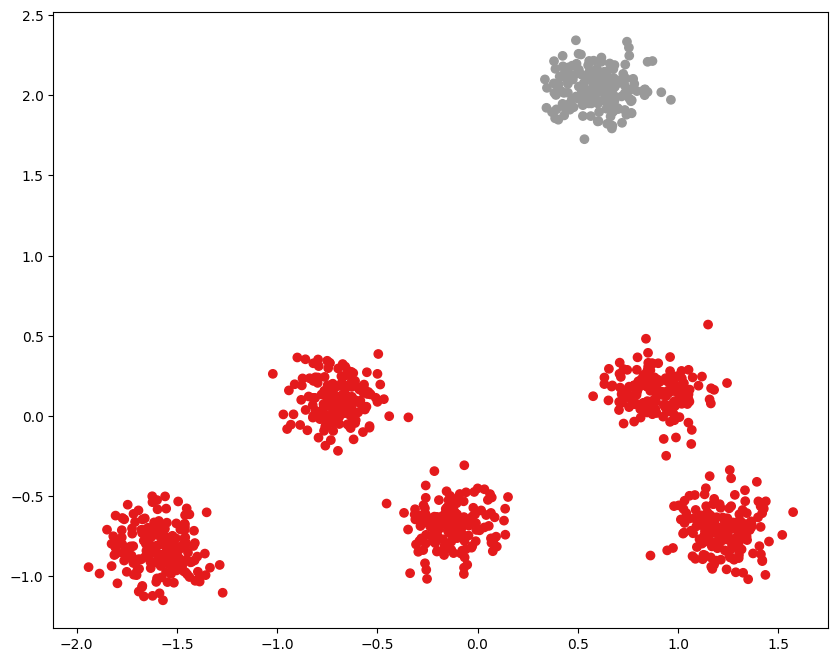

In [11]:
plt.figure()
plt.scatter(x=data_blobs_scaled[:, 0], y=data_blobs_scaled[:,1], c=mean_shift_clusters, cmap="Set1")
plt.show()

- Try different hyper-parameters (i.e. bandwidth, which is an important parameter for mean-shift) to find a combination with good results and plot them.

In [12]:
print(f"Automatic guess: {estimate_bandwidth(data_blobs_scaled):.2f}")

Automatic guess: 1.27


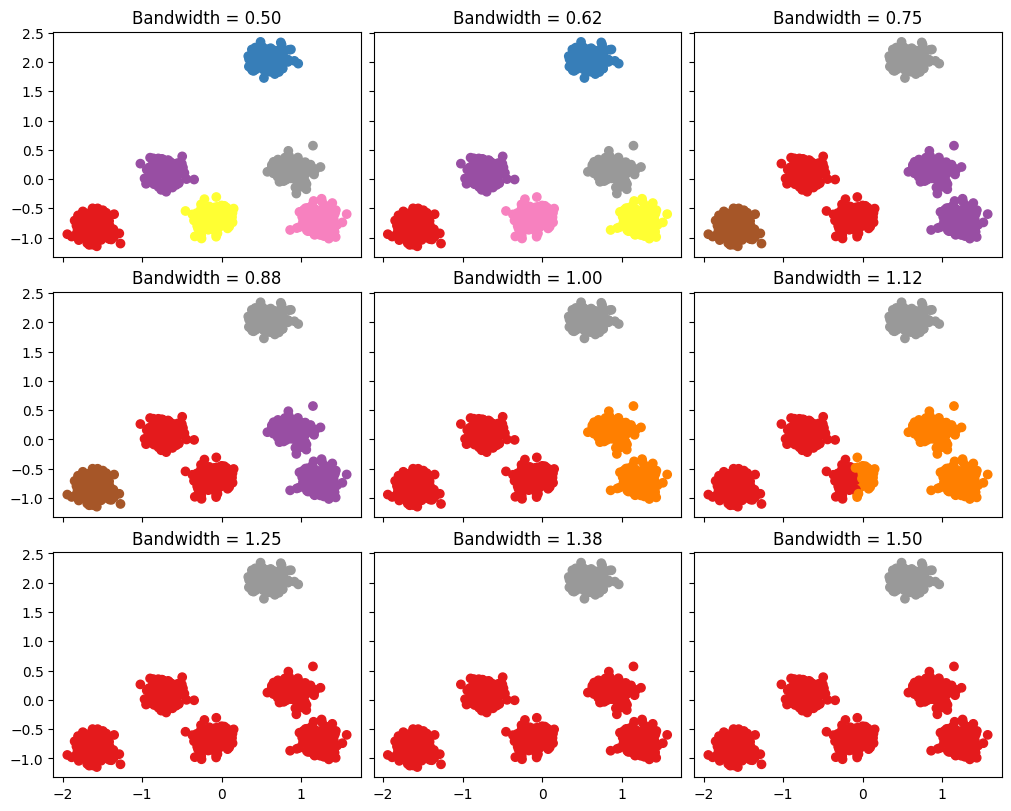

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex="all", sharey="all", layout="constrained")

for i, bw in enumerate(np.linspace(0.5, 1.5, 9)):

    mean_shift_clusters = MeanShift(bandwidth=bw).fit_predict(data_blobs_scaled)

    ax = axs.ravel()[i]
    
    ax.set_title(f"Bandwidth = {bw:.2f}")
    ax.scatter(x=data_blobs_scaled[:, 0], y=data_blobs_scaled[:,1], c=mean_shift_clusters, cmap="Set1")

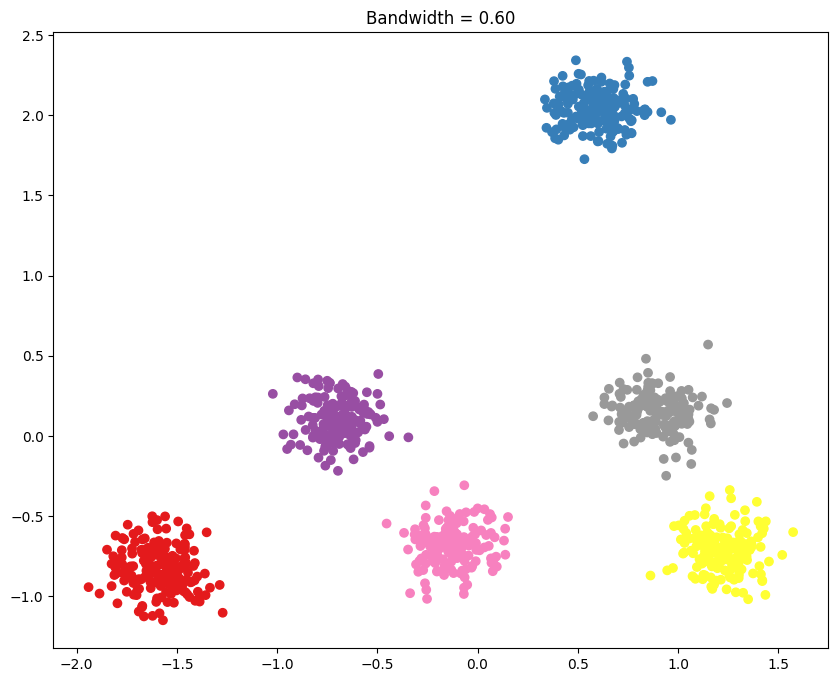

In [14]:
bandwidth = 0.6
mean_shift_clusters = MeanShift(bandwidth=bandwidth).fit_predict(data_blobs_scaled)

plt.figure()
plt.title(f"Bandwidth = {bandwidth:.2f}")
plt.scatter(x=data_blobs_scaled[:, 0], y=data_blobs_scaled[:,1], c=mean_shift_clusters, cmap="Set1")
plt.show()

### 2b) Toy dataset: spiral 

- Use the Mean-shift to cluster the Spiral dataset.
- Plot the results.

In [15]:
print(f"Automatic guess: {estimate_bandwidth(spiral_scaled):.2f}")

Automatic guess: 1.32


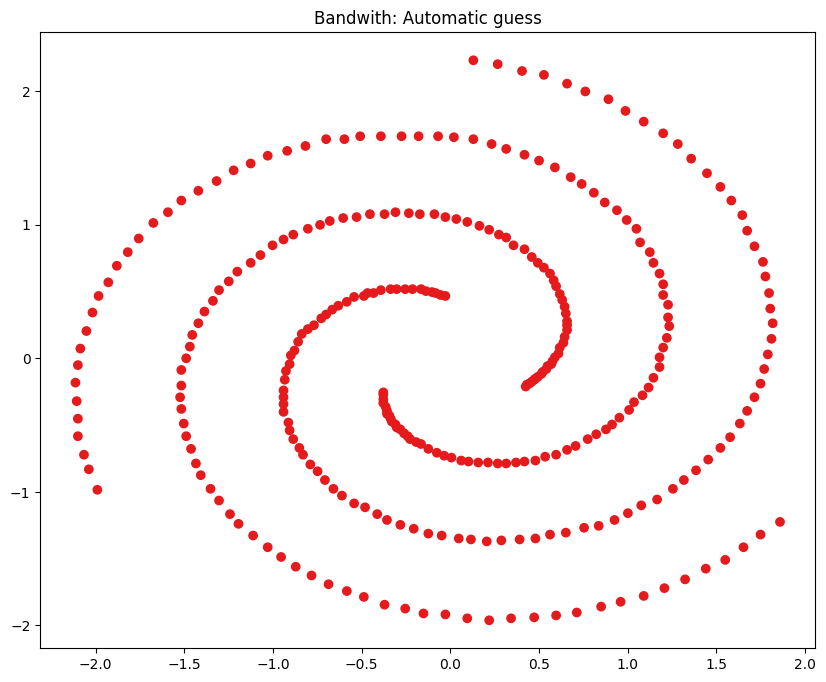

In [16]:
mean_shift_clusters = MeanShift().fit_predict(spiral_scaled)

plt.figure()
plt.scatter(x=spiral_scaled[:, 0], y=spiral_scaled[:,1], c=mean_shift_clusters, cmap="Set1")
plt.title(f"Bandwith: Automatic guess")
plt.show()

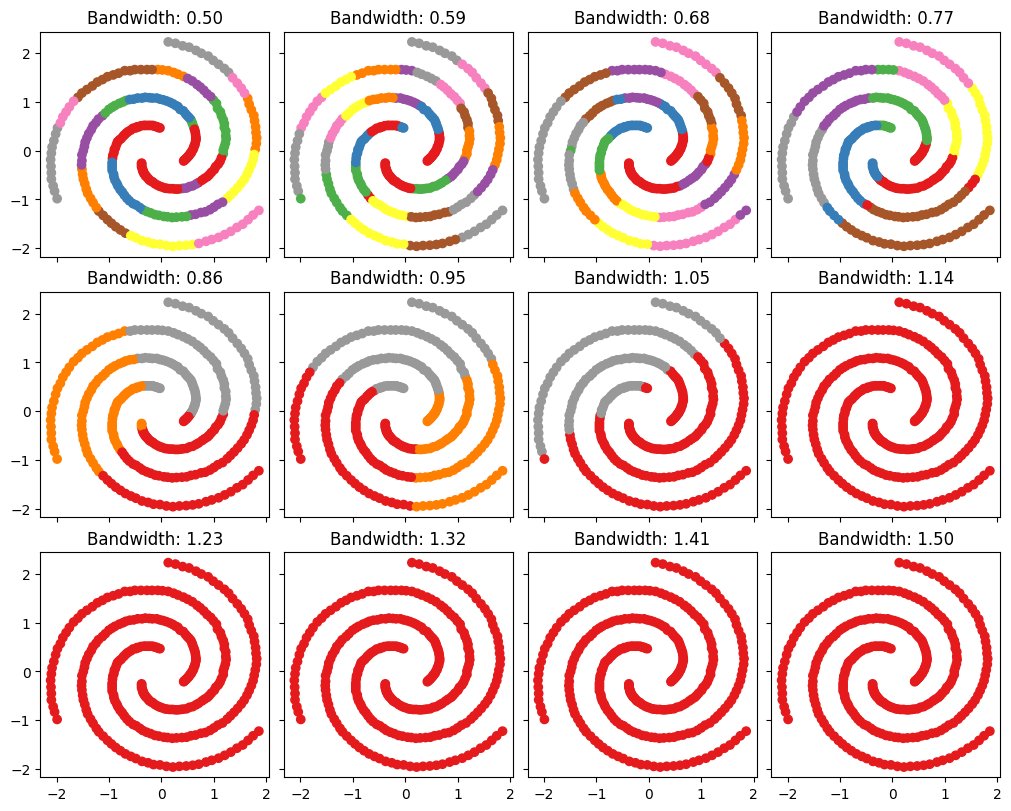

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=4, sharex="all", sharey="all", layout="constrained")

for i, bw in enumerate(np.linspace(0.5, 1.5, 12)):
    mean_shift_clusters = MeanShift(bandwidth=bw).fit_predict(spiral_scaled)

    ax = axs.ravel()[i]
    ax.set_title(f"Bandwidth: {bw:.2f}")
    ax.scatter(x=spiral_scaled[:, 0], y=spiral_scaled[:,1], c=mean_shift_clusters, cmap="Set1")

plt.show()

### Question
- Does it work?
- What kind of data cluster is this approach better at discovering?
- Do you have a solution for this dataset? Write down what you would try

Mean-Shift clustering works well (given the right hyper-parameters) for the `blobs` data, and poorly for the `spirals` data. The `spirals` data set doesn't provide any distinct modes that represent the individual spirals.

### 2c) Find a solution for the spiral dataset
- Everything is allowed here (as long as you don't give the algorithm the solution)

- Keep your unsuccsessful ideas as well and try to keep your code as clean as possible

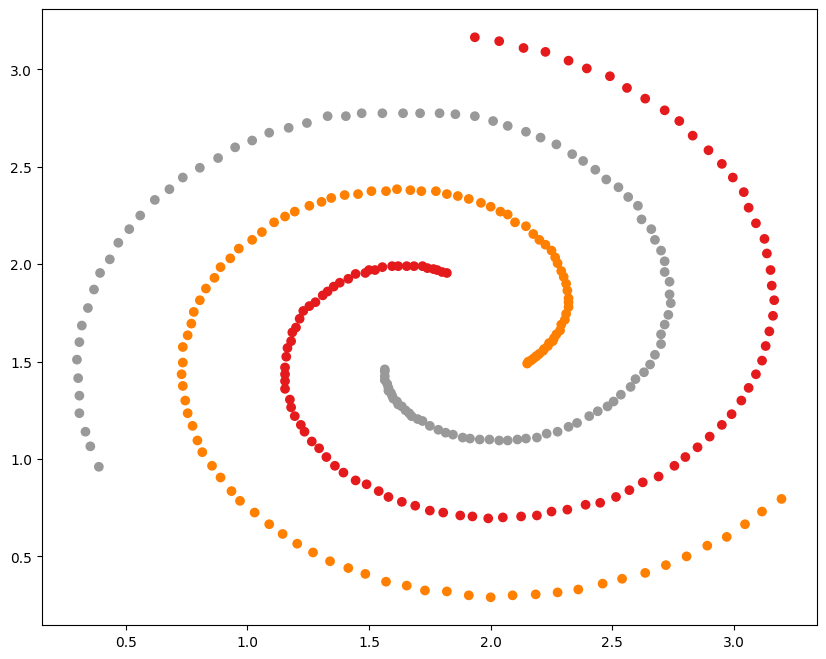

In [18]:
from sklearn.cluster import SpectralClustering

# sc_clusters = SpectralClustering(n_clusters=3).fit_predict(spiral_scaled)
# sc_clusters = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10).fit_predict(spiral_scaled)
# sc_clusters = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=3).fit_predict(spiral_scaled)

sc_clusters = SpectralClustering(n_clusters=3, affinity='rbf', gamma=100).fit_predict(spiral_scaled)

plt.figure()
plt.scatter(x=spiral[:, 0], y=spiral[:,1], c=sc_clusters, cmap="Set1")
plt.show()

## 3) Country Development Dataset (3 points)

Country data including some socio-economic and health factors that can jointly determine the overall development of the country. We will use K-means and mean-shift methods on this dataset to make decision to choose the countries that are in the direst need of aid.

### Data Dictionary
- country = Name of the country
- child_mort = Death of children under 5 years of age per 1000 live births
- exports = Exports of goods and services. Given as %age of the Total GDP
- health = Total health spending as %age of Total GDP
- imports = Imports of goods and services. Given as %age of the Total GDP
- income = Net income per person
- inflation = The measurement of the annual growth rate of the Total GDP
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population

### Data Investigation

Load the data

In [19]:
df_country = pd.read_csv('Datasets/country_data.csv')
df_country.set_index('country', inplace=True, drop=True)
df_country.columns = df_country.columns.str.upper()

Print the first few rows, datatypes, shape and basic statistics

In [20]:
print(df_country.head())

                     CHILD_MORT  EXPORTS  HEALTH  IMPORTS  INCOME  INFLATION  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     LIFE_EXPEC  TOTAL_FER   GDPP  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  


In [21]:
print(df_country.dtypes)

CHILD_MORT    float64
EXPORTS       float64
HEALTH        float64
IMPORTS       float64
INCOME          int64
INFLATION     float64
LIFE_EXPEC    float64
TOTAL_FER     float64
GDPP            int64
dtype: object


In [22]:
print(df_country.shape)

(167, 9)


In [23]:
print(df_country.describe())

       CHILD_MORT     EXPORTS      HEALTH     IMPORTS         INCOME  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        INFLATION  LIFE_EXPEC   TOTAL_FER           GDPP  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [24]:
print(df_country.isnull().sum(axis=0))

CHILD_MORT    0
EXPORTS       0
HEALTH        0
IMPORTS       0
INCOME        0
INFLATION     0
LIFE_EXPEC    0
TOTAL_FER     0
GDPP          0
dtype: int64


Visualise distribution of each feature in a histogram (plot 9 figures nicely organised with sub plots and drawn in a loop)

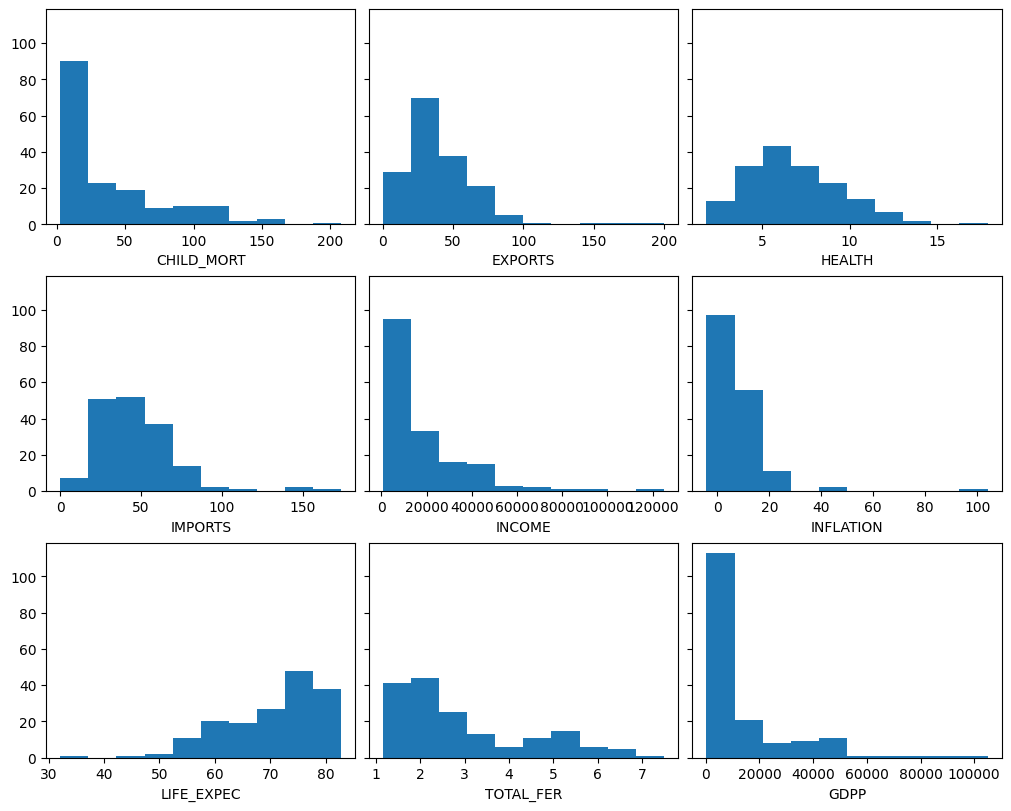

In [25]:
fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained", sharey="all")
columns = df_country.columns

for i, c in enumerate(columns):
    ax = axs.ravel()[i]
    ax.hist(df_country[c])
    ax.set_xlabel(c)
    
plt.show()

In [26]:
# Normalization
df_country_scaled = df_country.copy()

scaler = StandardScaler()

df_country_scaled[df_country_scaled.columns] = scaler.fit_transform(df_country)

print(df_country_scaled.head())

                     CHILD_MORT   EXPORTS    HEALTH   IMPORTS    INCOME  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.808245   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.585043   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

                     INFLATION  LIFE_EXPEC  TOTAL_FER      GDPP  
country                                                          
Afghanistan           0.157336   -1.619092   1.902882 -0.679180  
Albania              -0.312347    0.647866  -0.859973 -0.485623  
Algeria               0.789274    0.670423  -0.038404 -0.465376  
Angola                1.387054   -1.179234   2.128151 -0.516268  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817  


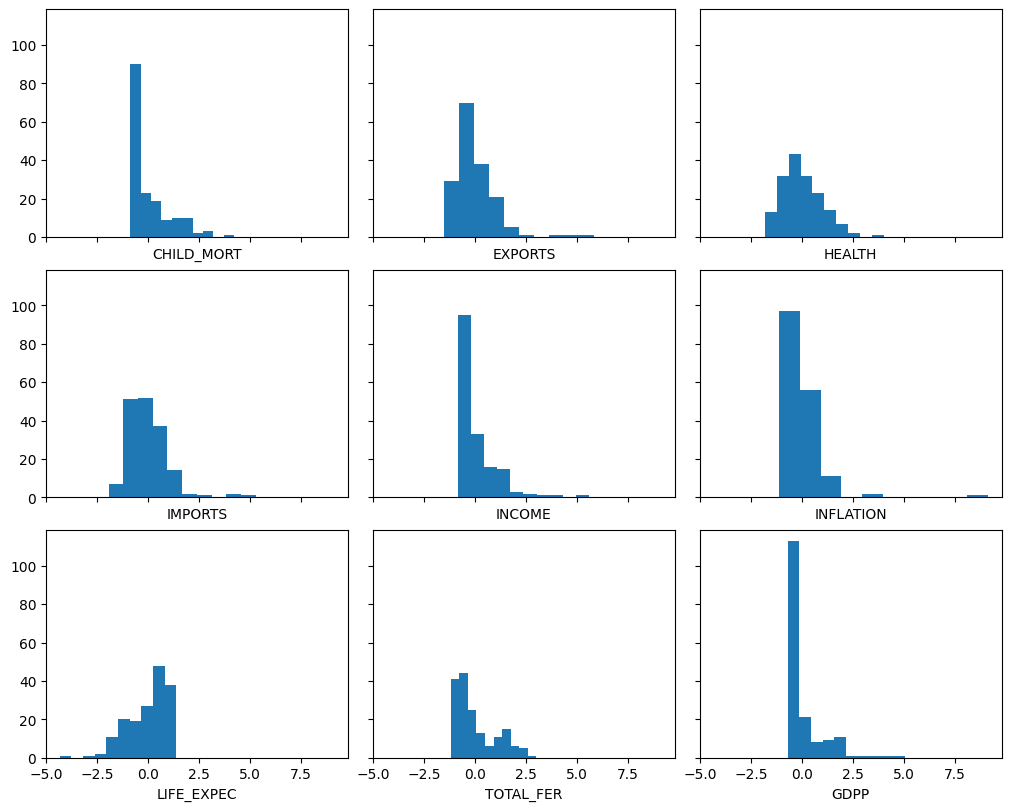

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained", sharey="all", sharex="all")
columns = df_country_scaled.columns

for i, c in enumerate(columns):
    ax = axs.ravel()[i]
    ax.hist(df_country_scaled[c])
    ax.set_xlabel(c)
    
plt.show()

### K-Means Clustering Health Factors
- Cluster the samples based on health factors(child_mort, life_expec, total_fer)
- Print the countries belonging to different clusters e.g.: 
            cluster: 0 [list of countries for each datapoint in the cluster]
- use the visualize function to visualize the results

In [28]:
df_country_red = df_country_scaled[["CHILD_MORT", "LIFE_EXPEC", "TOTAL_FER"]]

clusters = KMeans(random_state=42, n_clusters=4).fit_predict(df_country_red)

df_country_red_grouped = df_country_red
df_country_red_grouped.insert(len(df_country_red.columns), "CLUSTER", clusters)
df_country_red_grouped = df_country_red_grouped.groupby("CLUSTER")

for key, values in df_country_red_grouped:
    # print(df_country_red_grouped.get_group(key).to_string(), "\r\n")
    print(f"Cluster {key}: {df_country_red_grouped.get_group(key).index.to_list()}\r\n")

Cluster 0: ['Algeria', 'Azerbaijan', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Cambodia', 'Cape Verde', 'Dominican Republic', 'Egypt', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Micronesia, Fed. Sts.', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Paraguay', 'Philippines', 'Samoa', 'Saudi Arabia', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Tonga', 'Turkmenistan', 'Uzbekistan', 'Vanuatu']

Cluster 1: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Uganda', 'Zambia']

Cluster 2: ['Botswana', 'Comoros', 'Congo, Rep.', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Liberia', 'Madagascar', 'Mauritania', 'Namibia', 'Pakistan', 'Rwanda', 'Senegal', 

In [29]:
def visualise(data, idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data.values[:,0],data.values[:,1],data.values[:,2],marker='.', c=idx, cmap="Set1")
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_zlabel(data.columns[2])  
    plt.show()

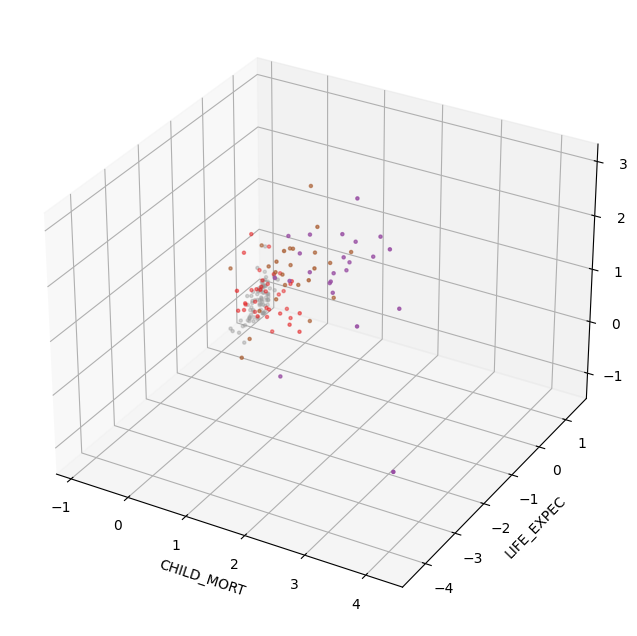

In [30]:
visualise(df_country_red, clusters)

### Cluster based on economic attributes
- Cluster the samples based on economic factors('income', 'gdpp', 'health')
- Print the countries belonging to different clusters e.g.: 
            cluster: 0 [list of countries for each datapoint in the cluster]
- use the visualize function to visualize the results

In [31]:
df_country_red = df_country_scaled[["INCOME", "GDPP", "HEALTH"]]

clusters = KMeans(random_state=42, n_clusters=4).fit_predict(df_country_red)

df_country_red_grouped = df_country_red
df_country_red_grouped.insert(len(df_country_red.columns), "CLUSTER", clusters)
df_country_red_grouped = df_country_red_grouped.groupby("CLUSTER")

for key, values in df_country_red_grouped:
    print(f"Cluster {key}: {df_country_red_grouped.get_group(key).index.to_list()}\r\n")

Cluster 0: ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Dominican Republic', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Sudan', 'Tajikistan', 'Tanzania', 'Thailand', 

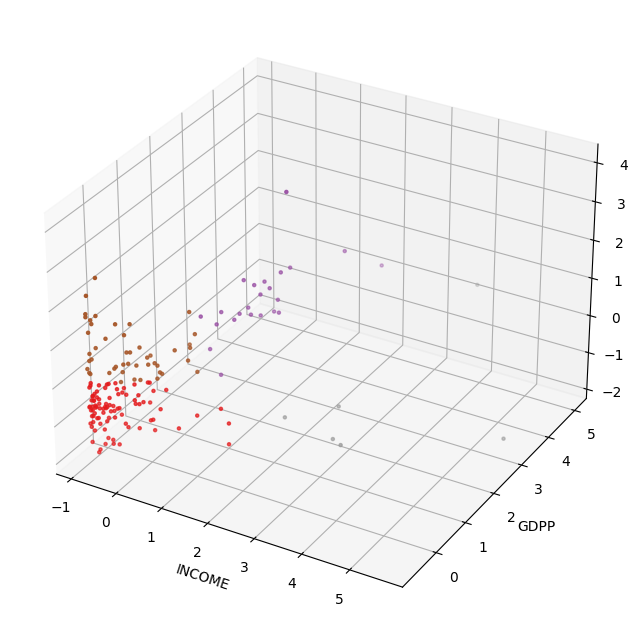

In [32]:
visualise(df_country_red, clusters)

### Cluster K-Means based on all Attributes
- Cluster the samples based on all attributes
- Print the countries belonging to different clusters e.g.: 
            cluster: 0 [list of countries for each datapoint in the cluster]

In [33]:
df_country_red = df_country_scaled.copy()

clusters = KMeans(random_state=42).fit_predict(df_country_red)

df_country_red_grouped = df_country_red
df_country_red_grouped.insert(len(df_country_red.columns), "CLUSTER", clusters)
df_country_red_grouped = df_country_red_grouped.groupby("CLUSTER")

for key, values in df_country_red_grouped:
    print(f"Cluster {key}: {df_country_red_grouped.get_group(key).index.to_list()}\r\n")

Cluster 0: ['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bolivia', 'Brazil', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'Gabon', 'Guatemala', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Peru', 'Philippines', 'Russia', 'Sri Lanka', 'Turkey', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen']

Cluster 1: ['Botswana', 'Cambodia', 'Guyana', 'Iraq', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Micronesia, Fed. Sts.', 'Namibia', 'Rwanda', 'Samoa', 'Solomon Islands', 'South Africa', 'Tajikistan', 'Togo', 'Tonga', 'Vanuatu']

Cluster 2: ['Albania', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Hungary', 'Jordan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malays

### Question:
Which feature set would you prefer and why? Do you think k-means clustering works well for this dataset?

_It seems that the feature set of `CHILD_MORT`, `LIFE_EXPEC` and `TOTAL_FER` (CLT) shows a stronger correlation between each other than the feature set of `INCOME`, `GDPP` and `HEALTH` (IGH). Whereas `INCOME` and `GDPP` show a strong correlation, `HEALTH` has a wide spread in low `INCOME` and low `GDPP` countries. Neither feature set really generates clear clusters, and the right choice of cluster number is quite unclear. The IGH feature set illuminates multiple facets of the socio-economic and health factors, whereas the CLT feature set seem to only investigate the health aspect._

### Mean Shift Clustering
- Cluster the samples based on all attributes using mean shift
- Print the countries belonging to different clusters e.g.: 
            cluster: 0 [list of countries for each datapoint in the cluster]

In [34]:
df_country_red = df_country_scaled.copy()

print(f"Automatic guess: {estimate_bandwidth(df_country_red):.2f}")

clusters = MeanShift(bandwidth=2.2).fit_predict(df_country_red)

df_country_red_grouped = df_country_red
df_country_red_grouped.insert(len(df_country_red.columns), "CLUSTER", clusters)
df_country_red_grouped = df_country_red_grouped.groupby("CLUSTER")

for key, values in df_country_red_grouped:
    print(f"Cluster {key}: {df_country_red_grouped.get_group(key).index.to_list()}\r\n")

Automatic guess: 2.93
Cluster 0: ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Madagascar', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'New Zealand', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sri L

### Question:
 Which method would you use to decide which countries need aid? Explain your choice and why this algorithm might worked better
 
_It seems to me that Mean-Shift has the potential to work better. The selection of bandwidth is non-trivial though._
 

## 4) Iris Dataset


In [35]:
# Load data
df_iris=pd.read_csv('Datasets/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df_iris.columns = df_iris.columns.str.upper()

## Seperate Test set
This time we have labels to our dataset as well. These can be used to quantify the clustering performance only use the train part to fit your clustering

In [36]:
# DO NOT CHANGE
iris_test = df_iris.sample(frac = 0.2, random_state=42) 
iris_train = df_iris.drop(iris_test.index)

In [37]:
# iris_train.set_index("SPECIES", inplace=True)
# iris_test.set_index("SPECIES", inplace=True)

### a) Discover the dataset
Print the first few rows, datatypes, shape and basic statistics
Visualise distribution of each feature in a histogram (plot 4 figures nicely organised with sub plots and drawn in a loop)

In [38]:
print(iris_train.head())

   SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH      SPECIES
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [39]:
print(iris_train.dtypes)

SEPAL_LENGTH    float64
SEPAL_WIDTH     float64
PETAL_LENGTH    float64
PETAL_WIDTH     float64
SPECIES          object
dtype: object


In [40]:
print(f"Shape of train: {iris_train.shape}; Shape of test: {iris_test.shape}")

Shape of train: (120, 5); Shape of test: (30, 5)


In [41]:
print(iris_train.describe())
print(iris_train["SPECIES"].value_counts())

       SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH
count    120.000000   120.000000    120.000000   120.000000
mean       5.809167     3.057500      3.727500     1.182500
std        0.823805     0.446398      1.751252     0.753442
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.750000     3.000000      4.250000     1.300000
75%        6.400000     3.325000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000
Iris-versicolor    41
Iris-setosa        40
Iris-virginica     39
Name: SPECIES, dtype: int64


In [42]:
print(iris_train.isnull().sum(axis=0),"\r\n")
print(iris_test.isnull().sum(axis=0))

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64 

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64


In [43]:
print(len(iris_train["SPECIES"].unique()))

3


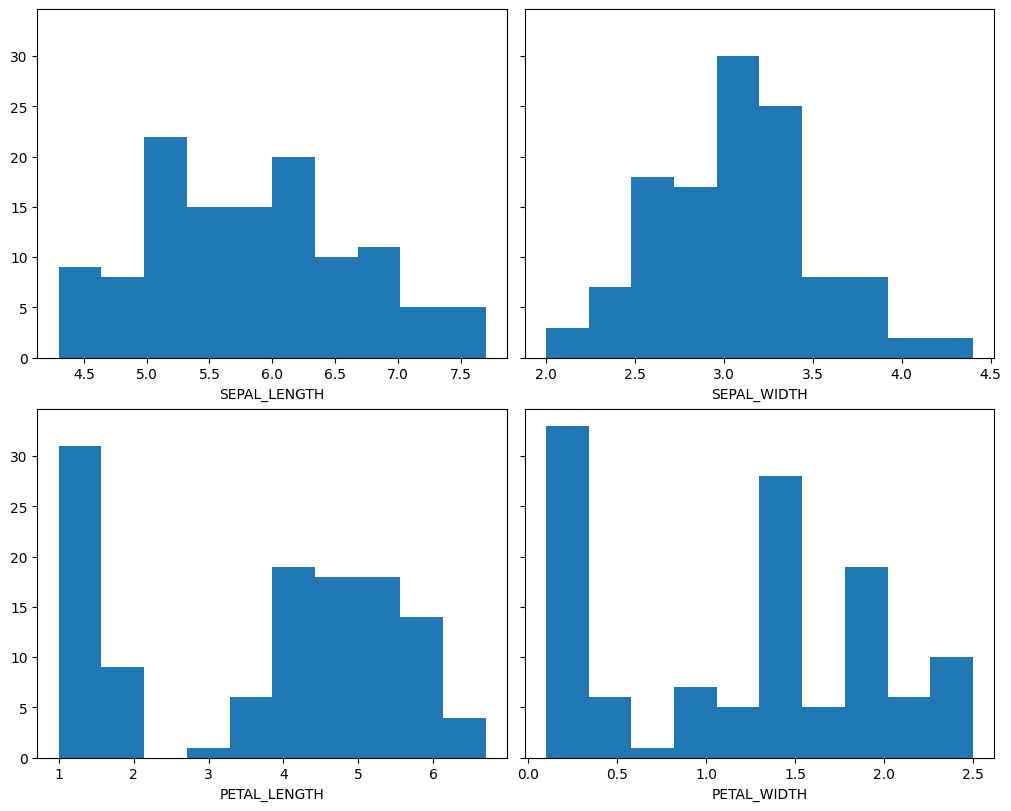

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, layout="constrained", sharey="all")
columns = iris_train.drop(columns="SPECIES").columns

for i, c in enumerate(columns):
    ax = axs.ravel()[i]
    ax.hist(iris_train[c])
    ax.set_xlabel(c)
    
plt.show()

In [45]:
# Normalize data
iris_train_scaled = iris_train.drop(columns="SPECIES")
iris_test_scaled = iris_test.drop(columns="SPECIES")

scaler = StandardScaler()
iris_train_scaled[iris_train_scaled.columns] = scaler.fit_transform(iris_train_scaled)
iris_test_scaled[iris_test_scaled.columns] = scaler.transform(iris_test_scaled)

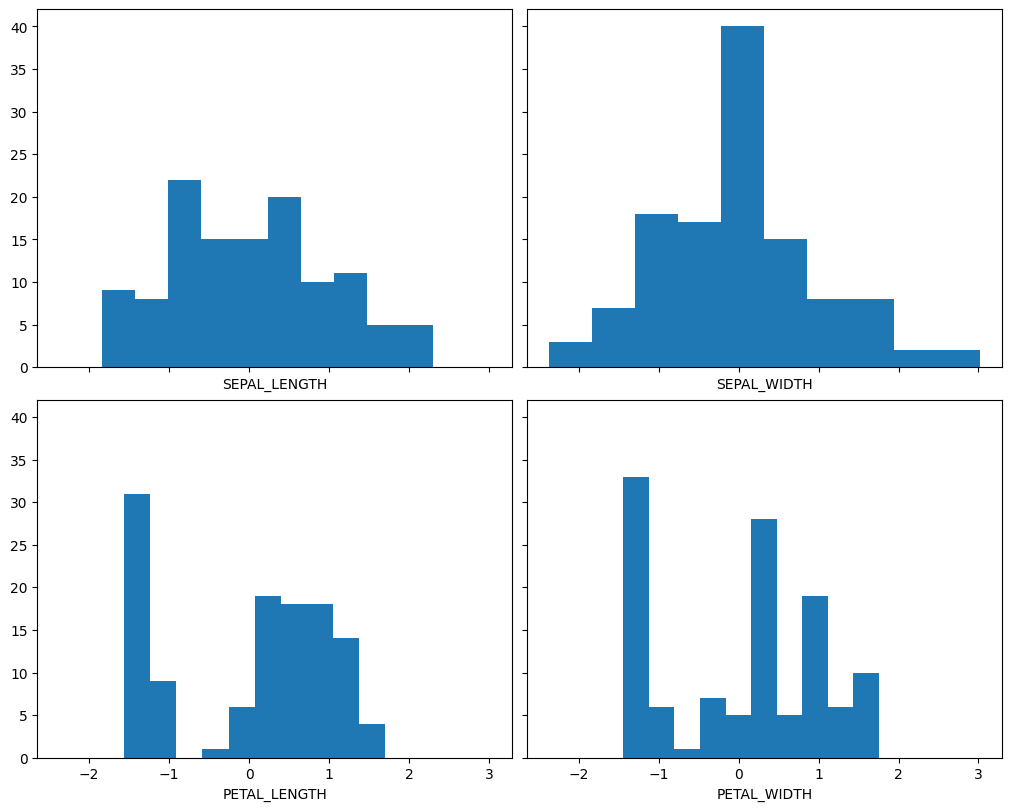

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, layout="constrained", sharey="all", sharex="all")
columns = iris_train_scaled.columns

for i, c in enumerate(columns):
    ax = axs.ravel()[i]
    ax.hist(iris_train_scaled[c])
    ax.set_xlabel(c)
    
plt.show()

### b) K-Means
- Cluster, print and visualize your predictions using 3 features (try at least 2 combinations) 


- Fit a model using all features and print the resulting clusters. This model will be used for metric evaluation. Save the predictions of this model to the variable y_kmeans

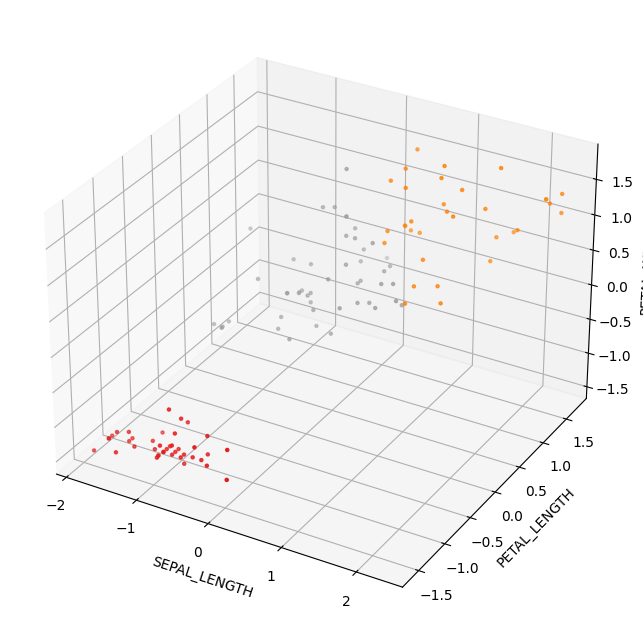

In [47]:
iris_train_red = iris_train_scaled.drop(columns=["SEPAL_WIDTH"])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_train_red)

# print(np.unique(clusters, return_counts=True))
visualise(iris_train_red, clusters)

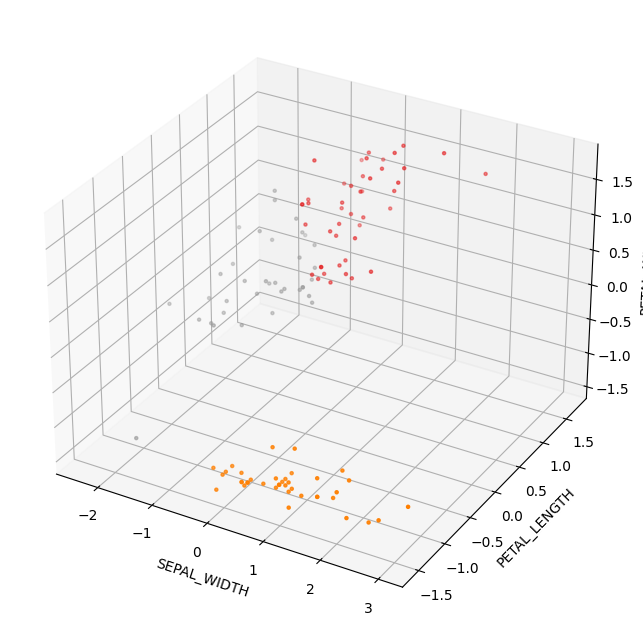

In [48]:
iris_train_red = iris_train_scaled.drop(columns=["SEPAL_LENGTH"])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_train_red)

# print(np.unique(clusters, return_counts=True))
visualise(iris_train_red, clusters)

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [50]:
y_kmeans = kmeans.predict(iris_train_scaled)

print(np.unique(y_kmeans, return_counts=True))

print(y_kmeans)

(array([0, 1, 2]), array([33, 40, 47], dtype=int64))
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 0 0 0 2 0 0 2 0 2 2 0 0 0 2 0 2 0 2 0 0 2 0 0 2 2 0 0 0
 2 0 0 2 0 2 0 0 2]


### b) Meanshift

Fit a model using all features and print the resulting clusters. This model will be used for Metric evaluation. Save the predictions of this model to the variable y_meanshift

In [51]:
print(f"Automatic guess: {estimate_bandwidth(iris_test_scaled):.2f}")

Automatic guess: 1.48


In [52]:
mean_shift = MeanShift()
mean_shift.fit(iris_train_scaled)

y_meanshift = mean_shift.predict(iris_train_scaled)

print(np.unique(y_meanshift, return_counts=True))
print(y_meanshift)

(array([0, 1], dtype=int64), array([80, 40], dtype=int64))
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Adapted Bandwidth

In [53]:
mean_shift = MeanShift(bandwidth=1.3)
mean_shift.fit(iris_train_scaled)

y_meanshift = mean_shift.predict(iris_train_scaled)

print(np.unique(y_meanshift, return_counts=True))
print(y_meanshift)

(array([0, 1, 2, 3], dtype=int64), array([66, 39, 10,  5], dtype=int64))
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 3 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 0 0 2 2 0
 0 0 0 0 2 0 0 0 0]


### Question
Which hyperparameter did you use? why did you choose them?

_For kmeans, I defined the number of clusters to be 3 to match the number of unique species in the training data. The automatic strategy of mean-shift produced only 2 modes and I therefore reduced the bandwidth to `1.3`._

Which method performs better? Explain how you come to this conclusion based on the parts above (without looking at the metrics).

_In this example, it seems that kmeans performs better. I primarily base this on the fact that mean-shift couldn't find a solution where the cluster number matches the number of unique species. We knew from the training data, that 3 distinct clusters would be appropriate to represent the different species. This knowledge can be used directly in kmeans whereas in mean-shift this can only be attempted indirectly via tuning the bandwidth._ 

## 5) Metric based Evaluation (3 points)

### Implementation
First you will implement some useful metrics which can help you measure the performance of your algorithms
Then use remaining 50 samples to figure out how your model performs on unseen data

In [54]:
# predict here the classes with the previously on the train dataset trained scaler, meanshift and kmeans, keep the parameter names
X_test_scaled = iris_test_scaled

y_test_meanshift = mean_shift.predict(X_test_scaled)
y_test_kmeans = kmeans.predict(X_test_scaled)

In [55]:
# complete these functions
def calculate_majority_label(my_cluster: pd.Series)-> str: 
    # Calculate to which label the cluster belongs (which class occurs most often)
    return my_cluster.value_counts(sort=True).index[0]

def coverage_of_class(my_cluster: pd.Series, my_dataset: pd.Series)-> float: 
    # calculate which percentage of the majority label is covered by this cluster 
    # with respect to the number of occurrence in the whole dataset
    label = calculate_majority_label(my_cluster)
    majority_label_indices_cluster = set(my_cluster[my_cluster == label].index)
    majority_label_indices_dataset = set(my_dataset[my_dataset == label].index)
    # print(label,majority_label_indices_cluster, majority_label_indices_dataset, sep="\r\n")
    return len(majority_label_indices_cluster.intersection(majority_label_indices_dataset)) / len(majority_label_indices_dataset)

def purity(my_cluster: pd.Series)-> float:
    # calculate the percentage of the majority class within the cluster
    label = calculate_majority_label(my_cluster)
    return len(my_cluster[my_cluster == label].index) / len(my_cluster.index)

In [56]:
''' 
    Needed to change 'species' to 'SPECIES'
'''
# DO NOT CHANGE
print('Kmeans')
clusters = np.unique(y_test_kmeans)
for i in clusters:
    print('cluster: ', i)
    cluster = iris_test["SPECIES"][y_test_kmeans == i]
    print(f'cluster {i} has a majority label of: {calculate_majority_label(iris_train["SPECIES"][y_kmeans == i])} in train label,')
    print(f'cluster {i} has a majority label of: {calculate_majority_label(cluster)},')
    print(f'covers {coverage_of_class(cluster, iris_test["SPECIES"])*100:.2f}% of this class,')
    print(f'has a purity of {purity(cluster)*100:.2f}%')

print('MeanShift')
clusters = np.unique(y_test_meanshift)
for i in clusters:
    print('cluster: ', i)
    cluster = iris_test["SPECIES"][y_test_meanshift == i]
    print(f'cluster {i} has a majority label of: {calculate_majority_label(iris_train["SPECIES"][y_meanshift == i])} in train label,')
    print(f'cluster {i} has a majority label of: {calculate_majority_label(cluster)},')
    print(f'covers {coverage_of_class(cluster, iris_test["SPECIES"])*100:.2f}% of this class,')
    print(f'has a purity of {purity(cluster)*100:.2f}%')


Kmeans
cluster:  0
cluster 0 has a majority label of: Iris-virginica in train label,
cluster 0 has a majority label of: Iris-virginica,
covers 90.91% of this class,
has a purity of 83.33%
cluster:  1
cluster 1 has a majority label of: Iris-setosa in train label,
cluster 1 has a majority label of: Iris-setosa,
covers 100.00% of this class,
has a purity of 100.00%
cluster:  2
cluster 2 has a majority label of: Iris-versicolor in train label,
cluster 2 has a majority label of: Iris-versicolor,
covers 77.78% of this class,
has a purity of 87.50%
MeanShift
cluster:  0
cluster 0 has a majority label of: Iris-versicolor in train label,
cluster 0 has a majority label of: Iris-versicolor,
covers 100.00% of this class,
has a purity of 52.94%
cluster:  1
cluster 1 has a majority label of: Iris-setosa in train label,
cluster 1 has a majority label of: Iris-setosa,
covers 100.00% of this class,
has a purity of 100.00%
cluster:  2
cluster 2 has a majority label of: Iris-virginica in train label,
clu

### Question:
- Did the metric confirm your intuition? _KMeans seems to work better overall. Both methods work well on `Iris-setosa` but Meanshift tends to assign `Iris-virginica` to `Iris-versicolor`._
- Why are metrics useful? _Since clustering, unlike classification, does not directly link the results to a label, we need to evaluate the metrics via the majority label within the cluster. Looking at coverage and purity gives a good indication if on the success._
- Can they be misleading as well? _If taken individually, yes. High coverage alone can mean little without high purity and vice-versa. In addition, for less homogeneous cluster results, the majority label could be wrong, resulting in inconclusive results._
- When does the purity get less reliable? _Purity becomes unmeaningful with very small cluster sizes._
- When does the coverage get less reliable? _Coverage becomes unmeaningful with very large cluster sizes._

Hint: Does the size of the clusters effect the metrics?

Explain your answers.

## 6) Your own Mean-shift implementation (5 points)

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

NOTE: You should not need use any other loops than the given for and while loop. Using further loops will result in points deducted since loops in python are slow compared to built in / numpy functions applied on arrays. However for development it can be useful to start with a loop to get a running version and later replace it with the faster function.

In [57]:
# import math
from numpy import linalg as la
# import numpy.matlib

In [58]:
# DO NOT MODIFY
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx, cmap="Set1")
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
def test_meanshift():
    data = np.genfromtxt('Datasets/toy_data.csv', delimiter=',')
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

In [59]:
def ml_meanshift(data: np.ndarray, h: float, theta: float, max_iter: int = 200):
    # ml_meanshift returns cluster indices and modes from computed with meanshift algorithm

    # Setup result arrays for modes and index
    modes = np.zeros(shape=(0, 2))
    index = np.ones(shape=(data.shape[0],)) * -1

    for i in range(len(index)):
        
        q_prev = data[i,:]
        
        # Loop for max_iter
        for _ in range(max_iter):
            # Epanechnikov kernel
            weights = np.clip(1 - la.norm((q_prev - data), 2, axis=1)**2/h**2, a_min=0, a_max=None)
            q_cur = np.sum(data * weights[:,np.newaxis], axis=0)/np.sum(weights)
            
            # Stopping condition
            if la.norm(q_cur - q_prev, 2) <= theta:
                break
            q_prev = q_cur
        
        # Check modes is empty or previous modes are farther away than h/5. If not assign starting point to closest existing mode. 
        if modes.shape[0] == 0 or all(la.norm(q_cur - modes, 2, axis=1) >= h/5):
            modes = np.vstack((modes, q_cur))
            index[i] = modes.shape[0] - 1
        else:
            index[i] = np.argmin(la.norm(q_cur - modes, 2, axis=1))

    return index, modes

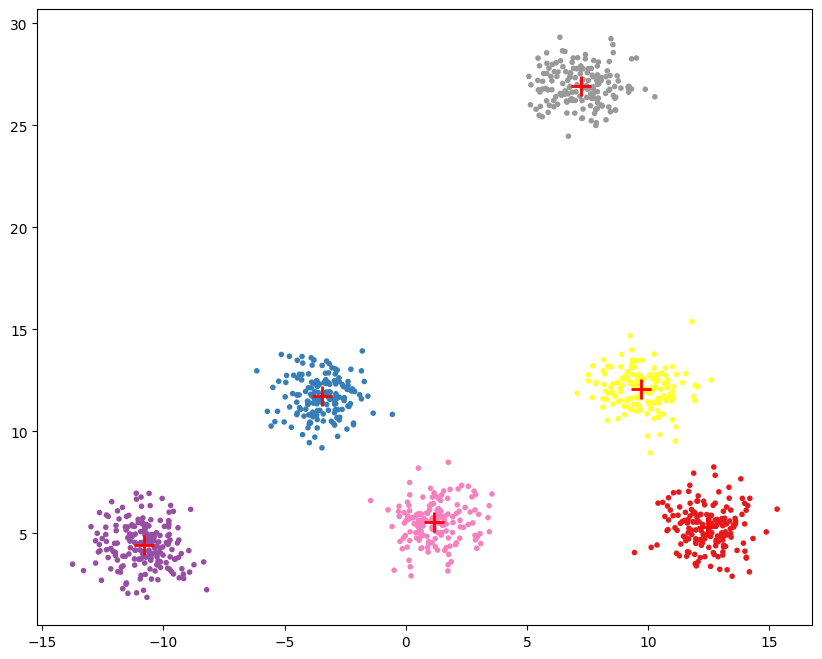

In [60]:
# test and visualise your results
test_meanshift()